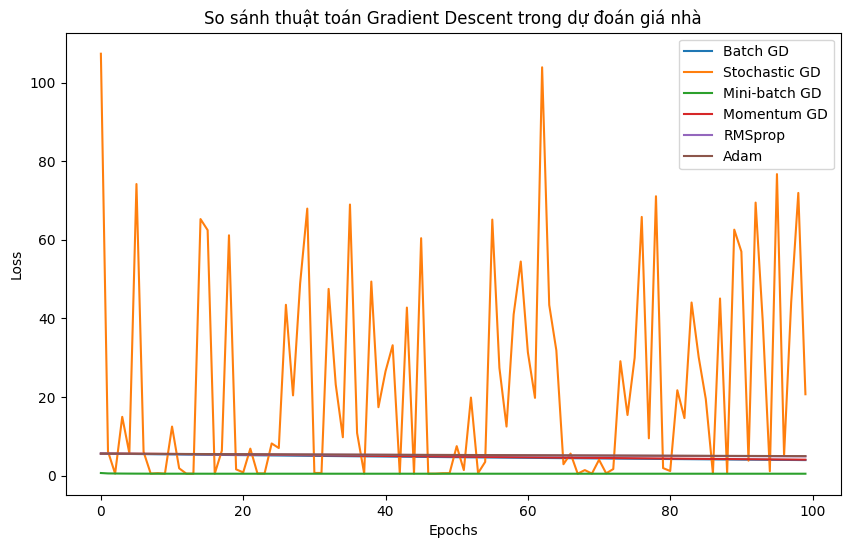

MSE của từng thuật toán trên tập Test:
Batch GD: 3.91181
Stochastic GD: 0.96044
Mini-batch GD: 0.55913
Momentum GD: 4.01293
RMSprop: 4.85729
Adam: 4.91577


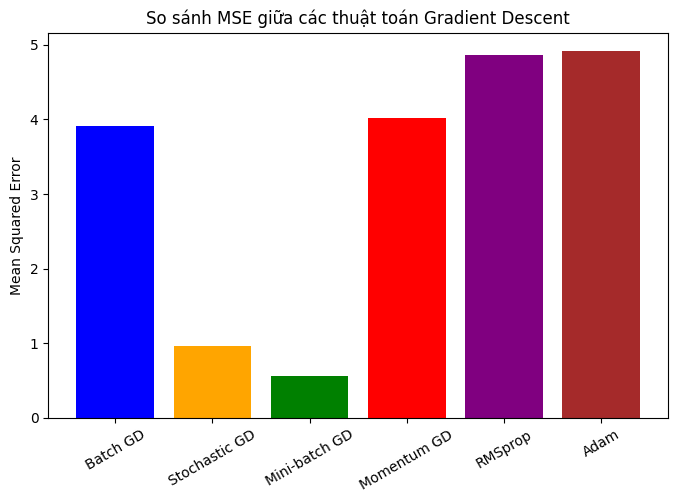

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hàm tính toán mất mát (MSE)
def compute_loss(y, y_pred):
    loss = np.mean((y - y_pred) ** 2)
    if loss > 1e10:
        print(f"Stopping early due to high loss: {loss}")
        return np.nan
    return loss

# Batch Gradient Descent
def batch_gradient_descent(X, y, lr=0.001, epochs=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        gradient = (-2/m) * X.T.dot(y - y_pred)
        gradient = np.clip(gradient, -1e4, 1e4)
        theta -= lr * gradient
        loss = compute_loss(y, y_pred)
        if np.isnan(loss):
            break
        loss_history.append(loss)

    return theta, loss_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, lr=0.001, epochs=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = (-2) * xi.T.dot(yi - xi.dot(theta))
            gradient = np.clip(gradient, -1e4, 1e4)
            theta -= lr * gradient

        loss = compute_loss(y, X.dot(theta))
        if np.isnan(loss):
            break
        loss_history.append(loss)

    return theta, loss_history

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, lr=0.001, epochs=100, batch_size=16):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradient = (-2/len(xi)) * xi.T.dot(yi - xi.dot(theta))
            gradient = np.clip(gradient, -1e4, 1e4)
            theta -= lr * gradient

        loss = compute_loss(y, X.dot(theta))
        if np.isnan(loss):
            break
        loss_history.append(loss)

    return theta, loss_history

# Momentum Gradient Descent
def momentum_gradient_descent(X, y, lr=0.001, epochs=100, beta=0.9):
    m, n = X.shape
    theta = np.zeros((n, 1))
    velocity = np.zeros((n, 1))
    loss_history = []
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        gradient = (-2/m) * X.T.dot(y - y_pred)
        gradient = np.clip(gradient, -1e4, 1e4)
        velocity = beta * velocity + (1 - beta) * gradient
        theta -= lr * velocity
        loss = compute_loss(y, y_pred)
        if np.isnan(loss):
            break
        loss_history.append(loss)

    return theta, loss_history

# RMSprop
def rmsprop(X, y, lr=0.001, epochs=100, beta=0.9, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros((n, 1))
    squared_gradient = np.zeros((n, 1))
    loss_history = []
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        gradient = (-2/m) * X.T.dot(y - y_pred)
        gradient = np.clip(gradient, -1e4, 1e4)
        squared_gradient = beta * squared_gradient + (1 - beta) * (gradient ** 2)
        theta -= lr * gradient / (np.sqrt(squared_gradient) + epsilon)
        loss = compute_loss(y, y_pred)
        if np.isnan(loss):
            break
        loss_history.append(loss)

    return theta, loss_history

# Adam Optimizer
def adam(X, y, lr=0.001, epochs=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros((n, 1))
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))
    loss_history = []
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        y_pred = X.dot(theta)
        gradient = (-2/m) * X.T.dot(y - y_pred)
        gradient = np.clip(gradient, -1e4, 1e4)
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)
        m_hat = m_t / (1 - beta1 ** (epoch + 1))
        v_hat = v_t / (1 - beta2 ** (epoch + 1))
        theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        loss = compute_loss(y, X.dot(theta))
        if np.isnan(loss):
            break
        loss_history.append(loss)

    return theta, loss_history

# Load dữ liệu California Housing
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Thêm bias
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Chạy các thuật toán
epochs = 100
theta_bgd, loss_bgd = batch_gradient_descent(X_train_b, y_train, epochs=epochs)
theta_sgd, loss_sgd = stochastic_gradient_descent(X_train_b, y_train, epochs=epochs)
theta_mbgd, loss_mbgd = mini_batch_gradient_descent(X_train_b, y_train, epochs=epochs)
theta_momentum, loss_momentum = momentum_gradient_descent(X_train_b, y_train, epochs=epochs)
theta_rmsprop, loss_rmsprop = rmsprop(X_train_b, y_train, epochs=epochs)
theta_adam, loss_adam = adam(X_train_b, y_train, epochs=epochs)

# Vẽ đồ thị so sánh
plt.figure(figsize=(10,6))
plt.plot(loss_bgd, label="Batch GD")
plt.plot(loss_sgd, label="Stochastic GD")
plt.plot(loss_mbgd, label="Mini-batch GD")
plt.plot(loss_momentum, label="Momentum GD")
plt.plot(loss_rmsprop, label="RMSprop")
plt.plot(loss_adam, label="Adam")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("So sánh thuật toán Gradient Descent trong dự đoán giá nhà")
plt.show()


from sklearn.metrics import mean_squared_error

# Hàm dự đoán
def predict(X, theta):
    return X.dot(theta)

# Đánh giá từng thuật toán
models = {
    "Batch GD": theta_bgd,
    "Stochastic GD": theta_sgd,
    "Mini-batch GD": theta_mbgd,
    "Momentum GD": theta_momentum,
    "RMSprop": theta_rmsprop,
    "Adam": theta_adam
}

mse_results = {}
for name, theta in models.items():
    y_pred = predict(X_test_b, theta)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse

# In kết quả
print("MSE của từng thuật toán trên tập Test:")
for name, mse in mse_results.items():
    print(f"{name}: {mse:.5f}")

# Vẽ đồ thị so sánh MSE
plt.figure(figsize=(8,5))
plt.bar(mse_results.keys(), mse_results.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylabel("Mean Squared Error")
plt.title("So sánh MSE giữa các thuật toán Gradient Descent")
plt.xticks(rotation=30)
plt.show()